## Software Specifications

To run this Jupyter Notebook, you need the following software and libraries:

- **Visual Studio Code (VSCode)**: Recommended for editing and running Jupyter Notebooks
- **Python**: Version 3.6 or higher
- **Jupyter Notebook**: Version 6.0 or higher
- **Pandas**: Version 1.0 or higher
- **Random**: Standard Python library
- **Matplotlib**: Version 3.0 or higher

# Game update description

In this simulation V3 you can chose the amount of players yourself and enter their guess amount

## Instructions how to play:

1. Enter the total number of players.
2. Enter the names of each player.
3. Start round 1 where each player guesses a number between 500 and 999.

    Play untill everybody wins at least one round!


    See how many original names you can come up with in this simulation.
    So in case you don't know, you have to input the names and values in the terminal.
    If you are opening this in VS code. Enter the values in the searchbar on top of your screen.

    I am working hard on providing you a GUI in python. This is all for now. 

    Cheers thank you!

---

## Project Skyline

This project simulates a game where players make guesses to win rounds and accumulate amounts based on their guesses. The game continues until only one player remains eligible to win a round. The simulation provides insights into player behavior and decision-making, which can be analyzed for various purposes, including economic research and gamification techniques.



Round 1:
Winner of the round: james
Pot for this round: 4440

Round 2:
Winner of the round: jessy
Pot for this round: 4440

Round 3:
Winner of the round: cynthia
Pot for this round: 4440

Round 4:
Winner of the round: tracy
Pot for this round: 4440

Round 5:
Winner of the round: misty
Pot for this round: 5328

Round 6:
Winner of the round: may
Pot for this round: 6216

Round 7:
Winner of the round: gary
Pot for this round: 7104

Round 8:
Winner of the final round: aash
Pot for this round: 8000

Summary Statistics:

Player: aash
Guesses per round:
Round 1: 999
Round 2: 999
Round 3: 999
Round 4: 999
Round 5: 999
Round 6: 999
Round 7: 999
Round 8: Default amount (1000) for final round

Player: gary
Guesses per round:
Round 1: 888
Round 2: 888
Round 3: 888
Round 4: 888
Round 5: 888
Round 6: 888
Round 7: 888
Round 8: Default amount (1000) for final round

Player: may
Guesses per round:
Round 1: 777
Round 2: 777
Round 3: 777
Round 4: 777
Round 5: 777
Round 6: 777
Round 7: 1000
Round 8: Defa

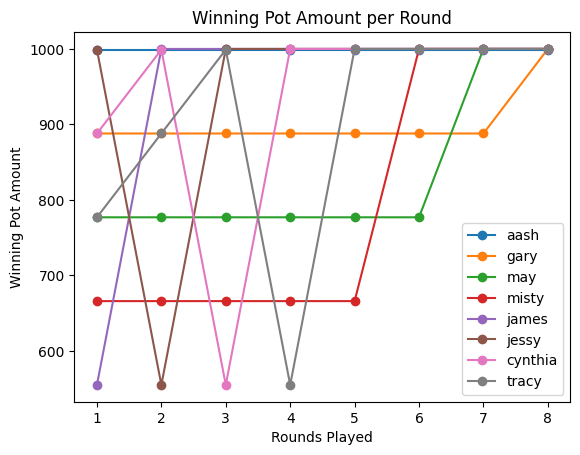

In [7]:
import matplotlib.pyplot as plt

class Player:
    def __init__(self, name):
        self.name = name
        self.rounds_won = 0
        self.amount = 0  # Initialize amount to 0
        self.guesses = []   # List to store guesses for each round

    def make_guess(self, default_amount, round_number):
        if self.rounds_won == 0:  # Only allow guesses if the player hasn't won a round yet
            guess = self.get_guess_input(default_amount, round_number)
            self.guesses.append(guess)
        else:
            # Set the guess to the default amount for the final round for all players
            self.guesses.append(default_amount)

    def get_guess_input(self, default_amount, round_number):
        while True:
            try:
                guess = int(input(f"{self.name}, enter your guess for round {round_number} (between 500 and {default_amount - 1}): "))
                if 500 <= guess < default_amount:
                    return guess
                else:
                    print(f"Your guess must be between 500 and {default_amount - 1}. Try again.")
            except ValueError:
                print("Invalid input. Please enter a number.")

def play_game(players):
    num_players = len(players)
    default_amount = 1000

    round_number = 1
    while True:
        print(f"\nRound {round_number}:")

        # Each player makes a guess if they haven't won a round yet
        for player in players:
            player.make_guess(default_amount, round_number)

        # Determine the winner of the round
        eligible_players = [player for player in players if player.rounds_won == 0]
        if len(eligible_players) == 1:
            winner = eligible_players[0]
            winner.rounds_won += 1
            pot = default_amount * num_players  # Final round pot is always default_amount * num_players
            winner.amount += pot
            print(f"Winner of the final round: {winner.name}")
            print(f"Pot for this round: {pot}")
            break  # End the game if there's only one player left to win a round

        # Calculate the pot for the round
        pot = min(player.guesses[round_number - 1] for player in eligible_players) * num_players

        # Determine the winner of the round
        winner = min(eligible_players, key=lambda x: min(x.guesses))
        winner.rounds_won += 1

        # Distribute the pot
        winner.amount += pot
        for player in players:
            if player != winner:
                player.amount -= player.guesses[round_number - 1]  # Deduct each player's guess from their amount

        print(f"Winner of the round: {winner.name}")
        print(f"Pot for this round: {pot}")

        round_number += 1

    # For the final round, set the amount paid to the default amount for all players
    for player in players:
        if player.rounds_won > 0:  # Only for players who have won a round
            player.amount = default_amount * (player.rounds_won - 1)

    # Compute summary stats for each player
    print("\nSummary Statistics:")
    for player in players:
        if player.rounds_won > 0:  # Only for players who have won a round
            print(f"\nPlayer: {player.name}")
            print("Guesses per round:")
            for i, guess in enumerate(player.guesses):
                if guess is not None and i < len(player.guesses) - 1:  # Display actual guess if not the final round
                    print(f"Round {i + 1}: {guess}")
                else:
                    print(f"Round {i + 1}: Default amount ({default_amount}) for final round")

    plot_summary(players)

def plot_summary(players):
    rounds = list(range(1, len(players[0].guesses) + 1))
    winners = [player for player in players if player.rounds_won > 0]
    
    for player in winners:
        plt.plot(rounds, player.guesses, marker='o', label=player.name)

    plt.xlabel('Rounds Played')
    plt.ylabel('Winning Pot Amount')
    plt.title('Winning Pot Amount per Round')
    plt.legend()
    plt.show()

# Set the total number of players
num_players = int(input("Enter the total number of players: "))

# Add names for each player manually
players = []
for i in range(num_players):
    name = input(f"Enter the name for player {i + 1}: ")
    players.append(Player(name))

# Play the game
play_game(players)



Round 1:
Winner of the round: Frank
Pot for this round: 9100

Round 2:
Winner of the round: Steve
Pot for this round: 9350

Round 3:
Winner of the round: Tracy
Pot for this round: 9100

Round 4:
Winner of the round: Misty
Pot for this round: 9500

Round 5:
Winner of the round: may
Pot for this round: 9200

Round 6:
Winner of the round: Jessy
Pot for this round: 9500

Round 7:
Winner of the round: James
Pot for this round: 9600

Round 8:
Winner of the round: Bob
Pot for this round: 9860

Round 9:
Winner of the round: gary
Pot for this round: 9600

Round 10:
Winner of the final round: aash
Pot for this round: 10000

Summary Statistics:

Player: aash
Guesses per round:
Round 1: 989
Round 2: 960
Round 3: 999
Round 4: 999
Round 5: 999
Round 6: 999
Round 7: 999
Round 8: 999
Round 9: 999
Round 10: Default amount (1000) for final round

Player: gary
Guesses per round:
Round 1: 986
Round 2: 982
Round 3: 965
Round 4: 987
Round 5: 958
Round 6: 980
Round 7: 960
Round 8: 986
Round 9: 960
Round 10:

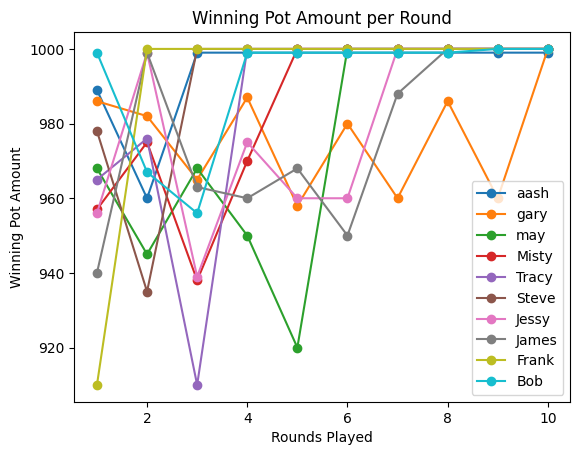

In [2]:
import matplotlib.pyplot as plt

class Player:
    def __init__(self, name):
        self.name = name
        self.rounds_won = 0
        self.amount = 0  # Initialize amount to 0
        self.guesses = []   # List to store guesses for each round

    def make_guess(self, default_amount, round_number):
        if self.rounds_won == 0:  # Only allow guesses if the player hasn't won a round yet
            guess = self.get_guess_input(default_amount, round_number)
            self.guesses.append(guess)
        else:
            # Set the guess to the default amount for the final round for all players
            self.guesses.append(default_amount)

    def get_guess_input(self, default_amount, round_number):
        while True:
            try:
                guess = int(input(f"{self.name}, enter your guess for round {round_number} (between 500 and {default_amount - 1}): "))
                if 500 <= guess < default_amount:
                    return guess
                else:
                    print(f"Your guess must be between 500 and {default_amount - 1}. Try again.")
            except ValueError:
                print("Invalid input. Please enter a number.")

def play_game(players):
    num_players = len(players)
    default_amount = 1000

    round_number = 1
    while True:
        print(f"\nRound {round_number}:")

        # Each player makes a guess if they haven't won a round yet
        for player in players:
            player.make_guess(default_amount, round_number)

        # Determine the winner of the round
        eligible_players = [player for player in players if player.rounds_won == 0]
        if len(eligible_players) == 1:
            winner = eligible_players[0]
            winner.rounds_won += 1
            pot = default_amount * num_players  # Final round pot is always default_amount * num_players
            winner.amount += pot
            print(f"Winner of the final round: {winner.name}")
            print(f"Pot for this round: {pot}")
            break  # End the game if there's only one player left to win a round

        # Calculate the pot for the round
        pot = min(player.guesses[round_number - 1] for player in eligible_players) * num_players

        # Determine the winner of the round
        winner = min(eligible_players, key=lambda x: min(x.guesses))
        winner.rounds_won += 1

        # Distribute the pot
        winner.amount += pot
        for player in players:
            if player != winner:
                player.amount -= player.guesses[round_number - 1]  # Deduct each player's guess from their amount

        print(f"Winner of the round: {winner.name}")
        print(f"Pot for this round: {pot}")

        round_number += 1

    # For the final round, set the amount paid to the default amount for all players
    for player in players:
        if player.rounds_won > 0:  # Only for players who have won a round
            player.amount = default_amount * (player.rounds_won - 1)

    # Compute summary stats for each player
    print("\nSummary Statistics:")
    for player in players:
        if player.rounds_won > 0:  # Only for players who have won a round
            print(f"\nPlayer: {player.name}")
            print("Guesses per round:")
            for i, guess in enumerate(player.guesses):
                if guess is not None and i < len(player.guesses) - 1:  # Display actual guess if not the final round
                    print(f"Round {i + 1}: {guess}")
                else:
                    print(f"Round {i + 1}: Default amount ({default_amount}) for final round")

    plot_summary(players)

def plot_summary(players):
    rounds = list(range(1, len(players[0].guesses) + 1))
    winners = [player for player in players if player.rounds_won > 0]
    
    for player in winners:
        plt.plot(rounds, player.guesses, marker='o', label=player.name)

    plt.xlabel('Rounds Played')
    plt.ylabel('Winning Pot Amount')
    plt.title('Winning Pot Amount per Round')
    plt.legend()
    plt.show()

# Set the total number of players
num_players = int(input("Enter the total number of players: "))

# Add names for each player manually
players = []
for i in range(num_players):
    name = input(f"Enter the name for player {i + 1}: ")
    players.append(Player(name))

# Play the game
play_game(players)



Round 1:
Winner of the round: Gary
Pot for this round: 8880

Round 2:
Winner of the round: Misty
Pot for this round: 9100

Round 3:
Winner of the round: Steve
Pot for this round: 9400

Round 4:
Winner of the round: May
Pot for this round: 9200

Round 5:
Winner of the round: Frank
Pot for this round: 9110

Round 6:
Winner of the round: Bob
Pot for this round: 9650

Round 7:
Winner of the round: Jessy
Pot for this round: 9700

Round 8:
Winner of the round: Aash
Pot for this round: 9700

Round 9:
Winner of the round: Tracy
Pot for this round: 9080

Round 10:
Winner of the final round: James
Pot for this round: 10000

Summary Statistics:

Player: Aash
Guesses per round:
Round 1: 999
Round 2: 980
Round 3: 980
Round 4: 980
Round 5: 960
Round 6: 980
Round 7: 990
Round 8: 980
Round 9: 1000
Round 10: Default amount (1000) for final round

Player: Gary
Guesses per round:
Round 1: 888
Round 2: 1000
Round 3: 1000
Round 4: 1000
Round 5: 1000
Round 6: 1000
Round 7: 1000
Round 8: 1000
Round 9: 1000


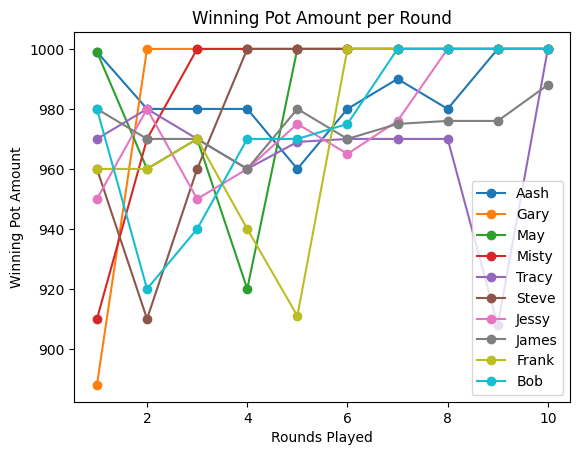

In [3]:
import matplotlib.pyplot as plt

class Player:
    def __init__(self, name):
        self.name = name
        self.rounds_won = 0
        self.amount = 0  # Initialize amount to 0
        self.guesses = []   # List to store guesses for each round

    def make_guess(self, default_amount, round_number):
        if self.rounds_won == 0:  # Only allow guesses if the player hasn't won a round yet
            guess = self.get_guess_input(default_amount, round_number)
            self.guesses.append(guess)
        else:
            # Set the guess to the default amount for the final round for all players
            self.guesses.append(default_amount)

    def get_guess_input(self, default_amount, round_number):
        while True:
            try:
                guess = int(input(f"{self.name}, enter your guess for round {round_number} (between 500 and {default_amount - 1}): "))
                if 500 <= guess < default_amount:
                    return guess
                else:
                    print(f"Your guess must be between 500 and {default_amount - 1}. Try again.")
            except ValueError:
                print("Invalid input. Please enter a number.")

def play_game(players):
    num_players = len(players)
    default_amount = 1000

    round_number = 1
    while True:
        print(f"\nRound {round_number}:")

        # Each player makes a guess if they haven't won a round yet
        for player in players:
            player.make_guess(default_amount, round_number)

        # Determine the winner of the round
        eligible_players = [player for player in players if player.rounds_won == 0]
        if len(eligible_players) == 1:
            winner = eligible_players[0]
            winner.rounds_won += 1
            pot = default_amount * num_players  # Final round pot is always default_amount * num_players
            winner.amount += pot
            print(f"Winner of the final round: {winner.name}")
            print(f"Pot for this round: {pot}")
            break  # End the game if there's only one player left to win a round

        # Calculate the pot for the round
        pot = min(player.guesses[round_number - 1] for player in eligible_players) * num_players

        # Determine the winner of the round
        winner = min(eligible_players, key=lambda x: min(x.guesses))
        winner.rounds_won += 1

        # Distribute the pot
        winner.amount += pot
        for player in players:
            if player != winner:
                player.amount -= player.guesses[round_number - 1]  # Deduct each player's guess from their amount

        print(f"Winner of the round: {winner.name}")
        print(f"Pot for this round: {pot}")

        round_number += 1

    # For the final round, set the amount paid to the default amount for all players
    for player in players:
        if player.rounds_won > 0:  # Only for players who have won a round
            player.amount = default_amount * (player.rounds_won - 1)

    # Compute summary stats for each player
    print("\nSummary Statistics:")
    for player in players:
        if player.rounds_won > 0:  # Only for players who have won a round
            print(f"\nPlayer: {player.name}")
            print("Guesses per round:")
            for i, guess in enumerate(player.guesses):
                if guess is not None and i < len(player.guesses) - 1:  # Display actual guess if not the final round
                    print(f"Round {i + 1}: {guess}")
                else:
                    print(f"Round {i + 1}: Default amount ({default_amount}) for final round")

    plot_summary(players)

def plot_summary(players):
    rounds = list(range(1, len(players[0].guesses) + 1))
    winners = [player for player in players if player.rounds_won > 0]
    
    for player in winners:
        plt.plot(rounds, player.guesses, marker='o', label=player.name)

    plt.xlabel('Rounds Played')
    plt.ylabel('Winning Pot Amount')
    plt.title('Winning Pot Amount per Round')
    plt.legend()
    plt.show()

# Set the total number of players
num_players = int(input("Enter the total number of players: "))

# Add names for each player manually
players = []
for i in range(num_players):
    name = input(f"Enter the name for player {i + 1}: ")
    players.append(Player(name))

# Play the game
play_game(players)



Round 1:
Winner of the round: Tracy
Pot for this round: 9110

Round 2:
Winner of the round: Steve
Pot for this round: 9110

Round 3:
Winner of the round: Bob
Pot for this round: 9100

Round 4:
Winner of the round: Misty
Pot for this round: 9110

Round 5:
Winner of the round: Jessy
Pot for this round: 9340

Round 6:
Winner of the round: Alice
Pot for this round: 9100

Round 7:
Winner of the round: Gary
Pot for this round: 9180

Round 8:
Winner of the round: May
Pot for this round: 9530

Round 9:
Winner of the round: James
Pot for this round: 9650

Round 10:
Winner of the final round: Aash
Pot for this round: 10000

Summary Statistics:
Player: Aash, Rounds Won: 1, Final Amount: 1098
Player: Gary, Rounds Won: 1, Final Amount: 3297
Player: May, Rounds Won: 1, Final Amount: 2774
Player: Misty, Rounds Won: 1, Final Amount: 6225
Player: Steve, Rounds Won: 1, Final Amount: 8151
Player: Tracy, Rounds Won: 1, Final Amount: 9110
Player: Bob, Rounds Won: 1, Final Amount: 7260
Player: Jessy, Round

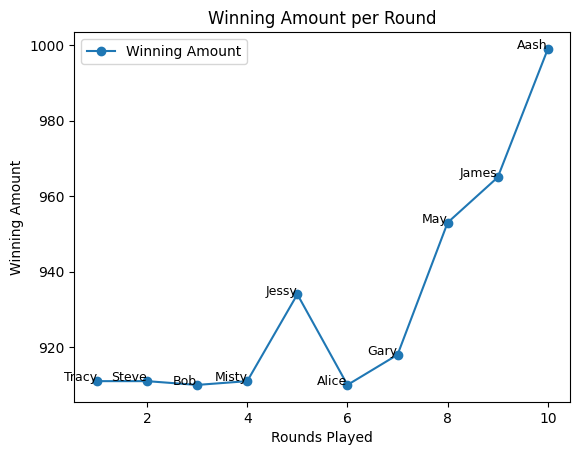

In [6]:
import matplotlib.pyplot as plt

class Player:
    def __init__(self, name):
        self.name = name
        self.rounds_won = 0
        self.amount = 0  # Initialize amount to 0
        self.guesses = []  # List to store guesses for each round

    def make_guess(self, default_amount, round_number):
        if self.rounds_won == 0:  # Only allow guesses if the player hasn't won a round yet
            guess = self.get_guess_input(default_amount, round_number)
            self.guesses.append(guess)
        else:
            self.guesses.append(None)  # Winners do not guess again

    def get_guess_input(self, default_amount, round_number):
        while True:
            try:
                guess = int(input(f"{self.name}, enter your guess for round {round_number} (between 500 and {default_amount - 1}): "))
                if 500 <= guess < default_amount:
                    return guess
                else:
                    print(f"Your guess must be between 500 and {default_amount - 1}. Try again.")
            except ValueError:
                print("Invalid input. Please enter a number.")

def play_game(players):
    num_players = len(players)
    default_amount = 1000

    round_number = 1
    while True:
        print(f"\nRound {round_number}:")

        # Each player makes a guess if they haven't won a round yet
        for player in players:
            player.make_guess(default_amount, round_number)

        # Eligible players are those who haven't won a round
        eligible_players = [player for player in players if player.rounds_won == 0]
        if len(eligible_players) == 1:
            winner = eligible_players[0]
            winner.rounds_won += 1
            pot = default_amount * num_players
            winner.amount += pot
            print(f"Winner of the final round: {winner.name}")
            print(f"Pot for this round: {pot}")
            break

        # Determine the minimum guess among eligible players
        min_guess = min(player.guesses[-1] for player in eligible_players if player.guesses[-1] is not None)
        potential_winners = [player for player in eligible_players if player.guesses[-1] == min_guess]

        # Handle ties: repeat guessing for tied players
        while len(potential_winners) > 1:
            print("Tie detected! Players must guess again with a lower amount.")
            for player in potential_winners:
                new_guess = player.get_guess_input(min_guess, round_number)
                player.guesses[-1] = new_guess  # Update the latest guess

            min_guess = min(player.guesses[-1] for player in potential_winners)
            potential_winners = [player for player in potential_winners if player.guesses[-1] == min_guess]

        winner = potential_winners[0]
        winner.rounds_won += 1

        # Calculate the pot
        pot = min_guess * num_players
        winner.amount += pot

        # Deduct guesses from other players
        for player in players:
            if player != winner and player.rounds_won == 0:
                player.amount -= player.guesses[-1]

        print(f"Winner of the round: {winner.name}")
        print(f"Pot for this round: {pot}")

        round_number += 1

    # Display summary
    print("\nSummary Statistics:")
    for player in players:
        print(f"Player: {player.name}, Rounds Won: {player.rounds_won}, Final Amount: {player.amount}")

    plot_summary(players)

def plot_summary(players):
    winning_rounds = []
    winning_amounts = []
    labels = []

    for round_number in range(len(players[0].guesses)):
        round_winner = None
        winning_guess = None

        for player in players:
            if len(player.guesses) > round_number and player.guesses[round_number] is not None:
                guess = player.guesses[round_number]
                if round_winner is None or guess < winning_guess:
                    round_winner = player
                    winning_guess = guess

        if round_winner is not None:
            winning_rounds.append(round_number + 1)
            winning_amounts.append(winning_guess)
            labels.append(round_winner.name)

    plt.plot(winning_rounds, winning_amounts, marker='o', label='Winning Amount')
    for i, label in enumerate(labels):
        plt.text(winning_rounds[i], winning_amounts[i], label, fontsize=9, ha='right')

    plt.xlabel('Rounds Played')
    plt.ylabel('Winning Amount')
    plt.title('Winning Amount per Round')
    plt.legend()
    plt.show()

# Set the total number of players
num_players = int(input("Enter the total number of players: "))

# Add names for each player manually
players = []
for i in range(num_players):
    name = input(f"Enter the name for player {i + 1}: ")
    players.append(Player(name))

# Play the game
play_game(players)


Round 1:
Winner of the round: Alice
Pot for this round: 2775

Round 2:
Winner of the round: Misty
Pot for this round: 3330

Round 3:
Winner of the round: May
Pot for this round: 3885

Round 4:
Winner of the round: Gary
Pot for this round: 4440

Round 5:
Winner of the final round: Aash
Pot for this round: 5000

Summary Statistics:
Player: Aash, Rounds Won: 1, Final Amount: 1004
Player: Gary, Rounds Won: 1, Final Amount: 1776
Player: May, Rounds Won: 1, Final Amount: 2331
Player: Misty, Rounds Won: 1, Final Amount: 2664
Player: Alice, Rounds Won: 1, Final Amount: 2775


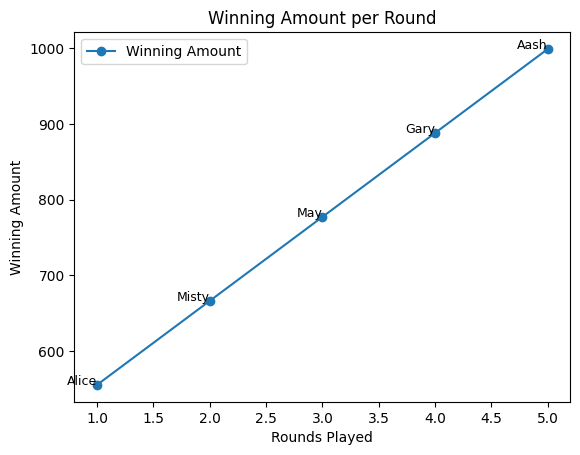

In [7]:
import matplotlib.pyplot as plt

class Player:
    def __init__(self, name):
        self.name = name
        self.rounds_won = 0
        self.amount = 0  # Initialize amount to 0
        self.guesses = []  # List to store guesses for each round

    def make_guess(self, default_amount, round_number):
        if self.rounds_won == 0:  # Only allow guesses if the player hasn't won a round yet
            guess = self.get_guess_input(default_amount, round_number)
            self.guesses.append(guess)
        else:
            self.guesses.append(None)  # Winners do not guess again

    def get_guess_input(self, default_amount, round_number):
        while True:
            try:
                guess = int(input(f"{self.name}, enter your guess for round {round_number} (between 500 and {default_amount - 1}): "))
                if 500 <= guess < default_amount:
                    return guess
                else:
                    print(f"Your guess must be between 500 and {default_amount - 1}. Try again.")
            except ValueError:
                print("Invalid input. Please enter a number.")

def play_game(players):
    num_players = len(players)
    default_amount = 1000

    round_number = 1
    while True:
        print(f"\nRound {round_number}:")

        # Each player makes a guess if they haven't won a round yet
        for player in players:
            player.make_guess(default_amount, round_number)

        # Eligible players are those who haven't won a round
        eligible_players = [player for player in players if player.rounds_won == 0]
        if len(eligible_players) == 1:
            winner = eligible_players[0]
            winner.rounds_won += 1
            pot = default_amount * num_players
            winner.amount += pot
            print(f"Winner of the final round: {winner.name}")
            print(f"Pot for this round: {pot}")
            break

        # Determine the minimum guess among eligible players
        min_guess = min(player.guesses[-1] for player in eligible_players if player.guesses[-1] is not None)
        potential_winners = [player for player in eligible_players if player.guesses[-1] == min_guess]

        # Handle ties: repeat guessing for tied players
        while len(potential_winners) > 1:
            print("Tie detected! Players must guess again with a lower amount.")
            for player in potential_winners:
                new_guess = player.get_guess_input(min_guess, round_number)
                player.guesses[-1] = new_guess  # Update the latest guess

            min_guess = min(player.guesses[-1] for player in potential_winners)
            potential_winners = [player for player in potential_winners if player.guesses[-1] == min_guess]

        winner = potential_winners[0]
        winner.rounds_won += 1

        # Calculate the pot
        pot = min_guess * num_players
        winner.amount += pot

        # Deduct guesses from other players
        for player in players:
            if player != winner and player.rounds_won == 0:
                player.amount -= player.guesses[-1]

        print(f"Winner of the round: {winner.name}")
        print(f"Pot for this round: {pot}")

        round_number += 1

    # Display summary
    print("\nSummary Statistics:")
    for player in players:
        print(f"Player: {player.name}, Rounds Won: {player.rounds_won}, Final Amount: {player.amount}")

    plot_summary(players)

def plot_summary(players):
    winning_rounds = []
    winning_amounts = []
    labels = []

    for round_number in range(len(players[0].guesses)):
        round_winner = None
        winning_guess = None

        for player in players:
            if len(player.guesses) > round_number and player.guesses[round_number] is not None:
                guess = player.guesses[round_number]
                if round_winner is None or guess < winning_guess:
                    round_winner = player
                    winning_guess = guess

        if round_winner is not None:
            winning_rounds.append(round_number + 1)
            winning_amounts.append(winning_guess)
            labels.append(round_winner.name)

    plt.plot(winning_rounds, winning_amounts, marker='o', label='Winning Amount')
    for i, label in enumerate(labels):
        plt.text(winning_rounds[i], winning_amounts[i], label, fontsize=9, ha='right')

    plt.xlabel('Rounds Played')
    plt.ylabel('Winning Amount')
    plt.title('Winning Amount per Round')
    plt.legend()
    plt.show()

# Set the total number of players
num_players = int(input("Enter the total number of players: "))

# Add names for each player manually
players = []
for i in range(num_players):
    name = input(f"Enter the name for player {i + 1}: ")
    players.append(Player(name))

# Play the game
play_game(players)



Round 1:
Winner of the round: Jessy
Pot for this round: 5814

Round 2:
Winner of the round: James
Pot for this round: 5814

Round 3:
Winner of the round: Aash
Pot for this round: 5460

Round 4:
Winner of the round: May
Pot for this round: 5928

Round 5:
Winner of the round: Gary
Pot for this round: 5880

Round 6:
Winner of the final round: Misty
Pot for this round: 6000

Summary Statistics:

Player: Aash
Guesses per round:
Round 1: 999
Round 2: 999
Round 3: 910
Round 4: 1000
Round 5: 1000
Round 6: Default amount (1000) for final round

Player: Gary
Guesses per round:
Round 1: 999
Round 2: 987
Round 3: 970
Round 4: 999
Round 5: 981
Round 6: Default amount (1000) for final round

Player: May
Guesses per round:
Round 1: 999
Round 2: 985
Round 3: 950
Round 4: 988
Round 5: 1000
Round 6: Default amount (1000) for final round

Player: Misty
Guesses per round:
Round 1: 999
Round 2: 986
Round 3: 970
Round 4: 999
Round 5: 980
Round 6: Default amount (1000) for final round

Player: Jessy
Guesses

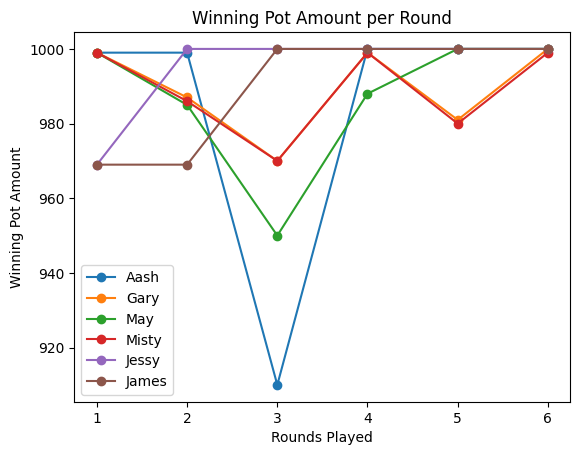

In [8]:
import matplotlib.pyplot as plt

class Player:
    def __init__(self, name):
        self.name = name
        self.rounds_won = 0
        self.amount = 0  # Initialize amount to 0
        self.guesses = []   # List to store guesses for each round

    def make_guess(self, default_amount, round_number):
        if self.rounds_won == 0:  # Only allow guesses if the player hasn't won a round yet
            guess = self.get_guess_input(default_amount, round_number)
            self.guesses.append(guess)
        else:
            # Set the guess to the default amount for the final round for all players
            self.guesses.append(default_amount)

    def get_guess_input(self, default_amount, round_number):
        while True:
            try:
                guess = int(input(f"{self.name}, enter your guess for round {round_number} (between 500 and {default_amount - 1}): "))
                if 500 <= guess < default_amount:
                    return guess
                else:
                    print(f"Your guess must be between 500 and {default_amount - 1}. Try again.")
            except ValueError:
                print("Invalid input. Please enter a number.")

def play_game(players):
    num_players = len(players)
    default_amount = 1000

    round_number = 1
    while True:
        print(f"\nRound {round_number}:")

        # Each player makes a guess if they haven't won a round yet
        for player in players:
            player.make_guess(default_amount, round_number)

        # Determine the winner of the round
        eligible_players = [player for player in players if player.rounds_won == 0]
        if len(eligible_players) == 1:
            winner = eligible_players[0]
            winner.rounds_won += 1
            pot = default_amount * num_players  # Final round pot is always default_amount * num_players
            winner.amount += pot
            print(f"Winner of the final round: {winner.name}")
            print(f"Pot for this round: {pot}")
            break  # End the game if there's only one player left to win a round

        # Calculate the pot for the round
        pot = min(player.guesses[round_number - 1] for player in eligible_players) * num_players

        # Determine the winner of the round
        winner = min(eligible_players, key=lambda x: min(x.guesses))
        winner.rounds_won += 1

        # Distribute the pot
        winner.amount += pot
        for player in players:
            if player != winner:
                player.amount -= player.guesses[round_number - 1]  # Deduct each player's guess from their amount

        print(f"Winner of the round: {winner.name}")
        print(f"Pot for this round: {pot}")

        round_number += 1

    # For the final round, set the amount paid to the default amount for all players
    for player in players:
        if player.rounds_won > 0:  # Only for players who have won a round
            player.amount = default_amount * (player.rounds_won - 1)

    # Compute summary stats for each player
    print("\nSummary Statistics:")
    for player in players:
        if player.rounds_won > 0:  # Only for players who have won a round
            print(f"\nPlayer: {player.name}")
            print("Guesses per round:")
            for i, guess in enumerate(player.guesses):
                if guess is not None and i < len(player.guesses) - 1:  # Display actual guess if not the final round
                    print(f"Round {i + 1}: {guess}")
                else:
                    print(f"Round {i + 1}: Default amount ({default_amount}) for final round")

    plot_summary(players)

def plot_summary(players):
    rounds = list(range(1, len(players[0].guesses) + 1))
    winners = [player for player in players if player.rounds_won > 0]
    
    for player in winners:
        plt.plot(rounds, player.guesses, marker='o', label=player.name)

    plt.xlabel('Rounds Played')
    plt.ylabel('Winning Pot Amount')
    plt.title('Winning Pot Amount per Round')
    plt.legend()
    plt.show()

# Set the total number of players
num_players = int(input("Enter the total number of players: "))

# Add names for each player manually
players = []
for i in range(num_players):
    name = input(f"Enter the name for player {i + 1}: ")
    players.append(Player(name))

# Play the game
play_game(players)
